#### 부산신항만 6개 동 구역 파일 합치기

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터파일 로드
# 용원동
df1 = pd.read_csv('../data/yongwondong0.1')
# 신호동
df2 = pd.read_csv('../data/shinhodong0.1')
# 명지동
df3 = pd.read_csv('../data/myungjidong0.1')
# 성북동
df4 = pd.read_csv('../data/sungbookdong0.1.csv')
# 천성동
df5 = pd.read_csv('../data/chunsundong0.1.csv')   
# 송정동
df6 = pd.read_csv('../data/songjeongdong0.2.csv')

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6])
df.head(2)

,Unnamed: 0,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소)
0,0,1,용원동,월세,228.37,123.12,-,-,2000,150,경상남도 창원시 진해구 용원동 단지내상가 코리아시티,단지내상가 코리아시티2층
1,1,2,용원동,월세,203.24,113.97,-,-,1000,100,경상남도 창원시 진해구 용원동 일반상가 신항주상가,일반상가 신항주상가5층


In [4]:
# 순번 열 자동화
df.reset_index(drop=True, inplace=True)
df['순번'] = df.index + 1
df.head(2)

,Unnamed: 0,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소)
0,0,1,용원동,월세,228.37,123.12,-,-,2000,150,경상남도 창원시 진해구 용원동 단지내상가 코리아시티,단지내상가 코리아시티2층
1,1,2,용원동,월세,203.24,113.97,-,-,1000,100,경상남도 창원시 진해구 용원동 일반상가 신항주상가,일반상가 신항주상가5층


In [5]:
# unnamed:0 칼럼 삭제
df.drop(columns=[ 'Unnamed: 0'], inplace=True)

In [6]:
df.head(2)

,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소)
0,1,용원동,월세,228.37,123.12,-,-,2000,150,경상남도 창원시 진해구 용원동 단지내상가 코리아시티,단지내상가 코리아시티2층
1,2,용원동,월세,203.24,113.97,-,-,1000,100,경상남도 창원시 진해구 용원동 일반상가 신항주상가,일반상가 신항주상가5층


In [7]:
# 6개 동 합친 파일 저장
df.to_csv('../data/부산항 창고_6개 구역 전체 파일.csv')

### 데이터 정제
* 데이터 타입 변경
* 매매가 -> 억으로 표시된거 만원 단위로 맞춰주기

In [8]:
df = pd.read_csv('../data/부산항 창고_6개 구역 전체 파일.csv' , index_col=0)
df.head()

,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소)
0,1,용원동,월세,228.37,123.12,-,-,2000,150,경상남도 창원시 진해구 용원동 단지내상가 코리아시티,단지내상가 코리아시티2층
1,2,용원동,월세,203.24,113.97,-,-,1000,100,경상남도 창원시 진해구 용원동 일반상가 신항주상가,일반상가 신항주상가5층
2,3,용원동,월세,214.42,108.52,-,-,2000,120,경상남도 창원시 진해구 용원동 일반상가 드림타워,일반상가 드림타워4층
3,4,용원동,월세,182.48,98.48,-,-,2000,150,경상남도 창원시 진해구 용원동 일반상가 신항코리아시티,일반상가 신항코리아시티2층
4,5,용원동,월세,388.19,247.08,-,-,6000,300,경상남도 창원시 진해구 용원동 일반상가 재경빌딩,일반상가 재경빌딩3층


* 매매가 단위 변경

In [9]:
# 매매가  단위변환(1) : 억으로 끝나는 값
def convert_to_manwon(s):
    if s == '-':
        return None    

    s = s.replace('억', '').replace(',', '')
    # 숫자로 변환
    try:
        num = int(s)
    except ValueError:
        return None    
    # 만원 단위로 변환하여 반환
    return num * 10000

# 매매가 열의 값을 만원 단위로 변환하여 새로운 열에 저장
df['매매가_1'] = df['매매가'].apply(convert_to_manwon)
df[-5:]

,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소),매매가_1
826,827,송정동,월세,-,-,1620,-,5000,490,부산시 강서구 송정동,대,NaN
827,828,송정동,매매,-,-,5306,13억,-,-,부산시 강서구 송정동 답,답,130000.0
828,829,송정동,매매,-,-,1007,"7억 6,200",-,-,부산시 강서구 송정동,대,NaN
829,830,송정동,매매,-,-,1596.7,"33억 8,100",-,-,부산시 강서구 송정동,대,NaN
830,831,송정동,매매,-,-,5344,42억,-,-,부산시 강서구 송정동 염전,염전,420000.0


In [10]:
# 억 단위변환(2) : 값이 억으로 끝나는 경우가 아닐 경우
def convert_to_manwon(s):
    if s == '-':
        return None    

# '억'을 기준으로 문자열을 분할
    unit_index = s.find('억')
    if unit_index != -1:
        billion_part = s[:unit_index]
        after_billion_part = s[unit_index+1:].replace(',', '')
    else:
        return None
    
    # '억' 앞의 숫자와 '억' 뒤의 숫자를 정수로 변환
    try:
        billion = int(billion_part)
        after_billion = int(after_billion_part)
    except ValueError:
        return None
    
    # 만원 단위로 변환하여 반환
    return billion * 10000 + after_billion

df['매매가_2'] = df['매매가'].apply(convert_to_manwon)

df[-5:]

,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소),매매가_1,매매가_2
826,827,송정동,월세,-,-,1620,-,5000,490,부산시 강서구 송정동,대,NaN,NaN
827,828,송정동,매매,-,-,5306,13억,-,-,부산시 강서구 송정동 답,답,130000.0,NaN
828,829,송정동,매매,-,-,1007,"7억 6,200",-,-,부산시 강서구 송정동,대,NaN,76200.0
829,830,송정동,매매,-,-,1596.7,"33억 8,100",-,-,부산시 강서구 송정동,대,NaN,338100.0
830,831,송정동,매매,-,-,5344,42억,-,-,부산시 강서구 송정동 염전,염전,420000.0,NaN


In [11]:
# 두 칼럼 합치기

# NaN 값을 0원으로 변경
df['매매가_1'] = df['매매가_1'].fillna(0)
df['매매가_2'] = df['매매가_2'].fillna(0)

df['매매가(단위:만원)'] = df['매매가_1'] + df['매매가_2']
df[-5:]

,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소),매매가_1,매매가_2,매매가(단위:만원)
826,827,송정동,월세,-,-,1620,-,5000,490,부산시 강서구 송정동,대,0.0,0.0,0.0
827,828,송정동,매매,-,-,5306,13억,-,-,부산시 강서구 송정동 답,답,130000.0,0.0,130000.0
828,829,송정동,매매,-,-,1007,"7억 6,200",-,-,부산시 강서구 송정동,대,0.0,76200.0,76200.0
829,830,송정동,매매,-,-,1596.7,"33억 8,100",-,-,부산시 강서구 송정동,대,0.0,338100.0,338100.0
830,831,송정동,매매,-,-,5344,42억,-,-,부산시 강서구 송정동 염전,염전,420000.0,0.0,420000.0


* 데이터 타입 변경

In [12]:
# 필요한 칼럼만 불러오기
group = df[['구분', '타입', '계약면적(㎡)', '전용면적(㎡)', '대지면적(㎡)','매매가(단위:만원)', '보증금 (단위: 만원)','월세(단위:만원)']]
group[-5:]

,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
826,송정동,월세,-,-,1620,0.0,5000,490
827,송정동,매매,-,-,5306,130000.0,-,-
828,송정동,매매,-,-,1007,76200.0,-,-
829,송정동,매매,-,-,1596.7,338100.0,-,-
830,송정동,매매,-,-,5344,420000.0,-,-


In [13]:
group.replace('-', 0, inplace=True)
group.head()

,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,용원동,월세,228.37,123.12,0,0.0,2000,150
1,용원동,월세,203.24,113.97,0,0.0,1000,100
2,용원동,월세,214.42,108.52,0,0.0,2000,120
3,용원동,월세,182.48,98.48,0,0.0,2000,150
4,용원동,월세,388.19,247.08,0,0.0,6000,300


In [14]:
group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 830
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   구분            831 non-null    object 
 1   타입            831 non-null    object 
 2   계약면적(㎡)       831 non-null    object 
 3   전용면적(㎡)       831 non-null    object 
 4   대지면적(㎡)       831 non-null    object 
 5   매매가(단위:만원)    831 non-null    float64
 6   보증금 (단위: 만원)  831 non-null    object 
 7   월세(단위:만원)     831 non-null    object 
dtypes: float64(1), object(7)
memory usage: 58.4+ KB


In [15]:
# 데이터타입 변경
group[['계약면적(㎡)', '전용면적(㎡)', '대지면적(㎡)', 
       '매매가(단위:만원)', '보증금 (단위: 만원)', '월세(단위:만원)']] = group[['계약면적(㎡)', '전용면적(㎡)', '대지면적(㎡)', 
                                                            '매매가(단위:만원)', '보증금 (단위: 만원)', '월세(단위:만원)']].astype(float).round().astype(int)
group.head()

,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,용원동,월세,228,123,0,0,2000,150
1,용원동,월세,203,114,0,0,1000,100
2,용원동,월세,214,109,0,0,2000,120
3,용원동,월세,182,98,0,0,2000,150
4,용원동,월세,388,247,0,0,6000,300


In [16]:
# 타입별 개수 추가
group_type = group.groupby(['구분','타입']).size().reset_index(name='타입별 개수')
group_type

,구분,타입,타입별 개수
0,명지동,매매,216
1,명지동,월세,517
2,명지동,전세,1
3,성북동,매매,6
4,송정동,매매,15
5,송정동,월세,5
6,신호동,매매,23
7,신호동,월세,19
8,용원동,매매,9
9,용원동,월세,10


In [17]:
# groupby로 계산
array_grouped = group.groupby(['구분', '타입']).agg({'계약면적(㎡)': 'mean', '전용면적(㎡)': 'mean', '대지면적(㎡)': 'mean',
                                                   '매매가(단위:만원)' : 'mean', '보증금 (단위: 만원)' :'mean', '월세(단위:만원)':'mean'}).reset_index()
array_grouped

,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,명지동,매매,466.726852,349.439815,595.245370,2.797393e+05,0.000000,0.000000
1,명지동,월세,1819.580271,182.129594,3.841393,0.000000e+00,3425.145068,207.303675
2,명지동,전세,204.000000,122.000000,0.000000,0.000000e+00,0.000000,0.000000
3,성북동,매매,0.000000,0.000000,4985.166667,8.167667e+04,0.000000,0.000000
4,송정동,매매,0.000000,0.000000,6591.800000,9.814200e+05,0.000000,0.000000
5,송정동,월세,600.000000,70.800000,598.600000,0.000000e+00,2600.000000,252.000000
6,신호동,매매,41.130435,30.956522,361.521739,8.017174e+04,0.000000,0.000000
7,신호동,월세,268.421053,174.263158,204.578947,0.000000e+00,3000.000000,214.736842
8,용원동,매매,171.000000,135.555556,1747.888889,1.488222e+06,0.000000,0.000000
9,용원동,월세,492.800000,210.000000,0.000000,0.000000e+00,6700.000000,414.500000


In [18]:
# array_grouped에 group_type 합치기
merge_grouped = pd.merge(group_type, array_grouped, on=['구분','타입'], how='inner')
merge_grouped

,구분,타입,타입별 개수,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,명지동,매매,216,466.726852,349.439815,595.245370,2.797393e+05,0.000000,0.000000
1,명지동,월세,517,1819.580271,182.129594,3.841393,0.000000e+00,3425.145068,207.303675
2,명지동,전세,1,204.000000,122.000000,0.000000,0.000000e+00,0.000000,0.000000
3,성북동,매매,6,0.000000,0.000000,4985.166667,8.167667e+04,0.000000,0.000000
4,송정동,매매,15,0.000000,0.000000,6591.800000,9.814200e+05,0.000000,0.000000
5,송정동,월세,5,600.000000,70.800000,598.600000,0.000000e+00,2600.000000,252.000000
6,신호동,매매,23,41.130435,30.956522,361.521739,8.017174e+04,0.000000,0.000000
7,신호동,월세,19,268.421053,174.263158,204.578947,0.000000e+00,3000.000000,214.736842
8,용원동,매매,9,171.000000,135.555556,1747.888889,1.488222e+06,0.000000,0.000000
9,용원동,월세,10,492.800000,210.000000,0.000000,0.000000e+00,6700.000000,414.500000


In [19]:
merge_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   구분            11 non-null     object 
 1   타입            11 non-null     object 
 2   타입별 개수        11 non-null     int64  
 3   계약면적(㎡)       11 non-null     float64
 4   전용면적(㎡)       11 non-null     float64
 5   대지면적(㎡)       11 non-null     float64
 6   매매가(단위:만원)    11 non-null     float64
 7   보증금 (단위: 만원)  11 non-null     float64
 8   월세(단위:만원)     11 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 924.0+ bytes


In [20]:
# 다시 반올림 및 데이터 타입 정수로 변경
merge_grouped[['계약면적(㎡)', '전용면적(㎡)', '대지면적(㎡)', 
       '매매가(단위:만원)', '보증금 (단위: 만원)', '월세(단위:만원)']] = merge_grouped[['계약면적(㎡)', '전용면적(㎡)', '대지면적(㎡)', 
                                                            '매매가(단위:만원)', '보증금 (단위: 만원)', '월세(단위:만원)']].astype(float).round().astype(int)
merge_grouped

,구분,타입,타입별 개수,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,명지동,매매,216,467,349,595,279739,0,0
1,명지동,월세,517,1820,182,4,0,3425,207
2,명지동,전세,1,204,122,0,0,0,0
3,성북동,매매,6,0,0,4985,81677,0,0
4,송정동,매매,15,0,0,6592,981420,0,0
5,송정동,월세,5,600,71,599,0,2600,252
6,신호동,매매,23,41,31,362,80172,0,0
7,신호동,월세,19,268,174,205,0,3000,215
8,용원동,매매,9,171,136,1748,1488222,0,0
9,용원동,월세,10,493,210,0,0,6700,414


In [21]:
merge_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   구분            11 non-null     object
 1   타입            11 non-null     object
 2   타입별 개수        11 non-null     int64 
 3   계약면적(㎡)       11 non-null     int32 
 4   전용면적(㎡)       11 non-null     int32 
 5   대지면적(㎡)       11 non-null     int32 
 6   매매가(단위:만원)    11 non-null     int32 
 7   보증금 (단위: 만원)  11 non-null     int32 
 8   월세(단위:만원)     11 non-null     int32 
dtypes: int32(6), int64(1), object(2)
memory usage: 660.0+ bytes


### 창고 위치별 지도 시각화

In [190]:
import folium  

In [284]:
map = folium.Map(location=[35.0673692,128.8521182], zoom_start=12.2)

In [285]:
# 각 지역별 반지름 지정
#radius_dict = {'명지동': 70, '성북동': 35, '송정동': 50, '신호동': 55, '용원동': 35,'천성동': 40}
radius_dict = {'명지동': 70, '성북동': 30, '송정동': 50, '신호동': 60, '용원동': 40,'천성동': 35}

# 각 지역별 위도, 경도 지정
location_dict = {'명지동': [35.1079767,128.924848], '성북동': [35.060441,128.8173813], '송정동': [35.0978089,128.8487525],
                '신호동': [35.0904701,128.884458], '용원동': [35.0957021,128.8183684], '천성동': [35.0353557,128.8200421]}

In [322]:
for i in merge_grouped['구분'].unique():
    df_subset = merge_grouped[merge_grouped['구분'] == i]
    tooltip = f"지역 : {i}<br>"
    
    for j, row in df_subset.iterrows():
        if row['타입'] == '매매':
            tooltip += f"1. 매매 : {row['타입별 개수']}곳<br>"
            tooltip += f"- 평균 평수 : 계약면적 {row['계약면적(㎡)']:,}㎡ / 전용면적 {row['전용면적(㎡)']:,}㎡ / 대지면적 {row['대지면적(㎡)']:,}㎡<br>"
            tooltip += f"- 평균 매매가: {int(row['매매가(단위:만원)']):,}만원<br>"
        elif row['타입'] == '월세':
            tooltip += f"2. 월세 : {row['타입별 개수']}곳<br>"
            tooltip += f"- 평균 평수 : 계약면적 {row['계약면적(㎡)']:,}㎡ / 전용면적 {row['전용면적(㎡)']:,}㎡ / 대지면적 {row['대지면적(㎡)']:,}㎡<br>"
            tooltip += f"- 평균 보증금: {int(row['보증금 (단위: 만원)']):,}만원<br>"
            tooltip += f"- 평균 월세: {int(row['월세(단위:만원)']):,}만원<br>"
            
    location = location_dict.get(i)
    radius = radius_dict.get(i, 80)
    folium.CircleMarker(location=location, radius=radius, fill=True, color = 'blue', fill_color = 'white', fill_opacity = '10%', tooltip=tooltip).add_to(map)
    
folium.Marker(location=[35.0809179, 128.8349832], tooltip='부산신항만', icon=folium.Icon(color='red', icon='ship', prefix='fa'), min_width=500, max_width=500).add_to(map)

map

### 시각화(2) - 판매 유형별 파이 그래프

In [288]:
df.head()

,순번,구분,타입,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가,보증금 (단위: 만원),월세(단위:만원),주소,기타(세부주소),매매가_1,매매가_2,매매가(단위:만원)
0,1,용원동,월세,228.37,123.12,-,-,2000,150,경상남도 창원시 진해구 용원동 단지내상가 코리아시티,단지내상가 코리아시티2층,0.0,0.0,0.0
1,2,용원동,월세,203.24,113.97,-,-,1000,100,경상남도 창원시 진해구 용원동 일반상가 신항주상가,일반상가 신항주상가5층,0.0,0.0,0.0
2,3,용원동,월세,214.42,108.52,-,-,2000,120,경상남도 창원시 진해구 용원동 일반상가 드림타워,일반상가 드림타워4층,0.0,0.0,0.0
3,4,용원동,월세,182.48,98.48,-,-,2000,150,경상남도 창원시 진해구 용원동 일반상가 신항코리아시티,일반상가 신항코리아시티2층,0.0,0.0,0.0
4,5,용원동,월세,388.19,247.08,-,-,6000,300,경상남도 창원시 진해구 용원동 일반상가 재경빌딩,일반상가 재경빌딩3층,0.0,0.0,0.0


In [289]:
sellType= df.groupby('타입').size().reset_index(name='합계')
sellType

,타입,합계
0,매매,279
1,월세,551
2,전세,1


In [303]:
# 파이 그래프 그리기(1) - 타입 유형
import matplotlib.pyplot as plt
# 한글 출력 오류 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False # - 표심 깨짐 방지
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

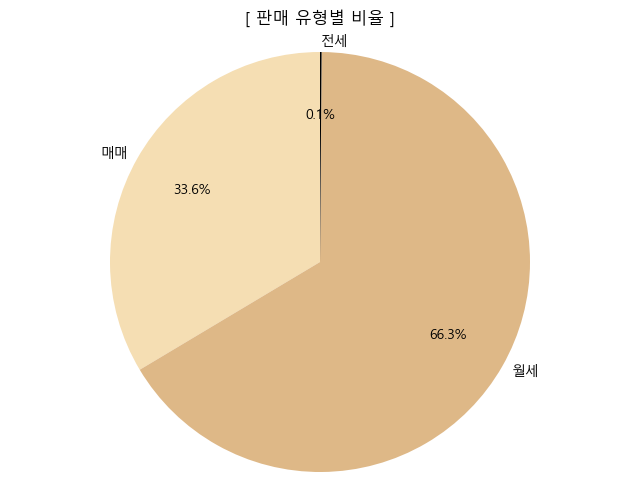

In [320]:
import matplotlib.pyplot as plt

# 데이터
labels = sellType['타입']
sizes = sellType['합계']
colors = ['wheat','burlywood','black']
# 파이 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        labeldistance=1.05, pctdistance=0.7, colors=colors)
plt.axis('equal')  # 원형으로 표시

# 그래프 제목 추가
plt.title('[ 판매 유형별 비율 ]')

# 그래프 표시
plt.show()

####

### 시각화(3) - 각 구역별 보증금, 월세, 매매가 가격 및 평균 가격 그래프

In [30]:
merge_grouped.head()

,구분,타입,타입별 개수,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,명지동,매매,216,467,349,595,279739,0,0
1,명지동,월세,517,1820,182,4,0,3425,207
2,명지동,전세,1,204,122,0,0,0,0
3,성북동,매매,6,0,0,4985,81677,0,0
4,송정동,매매,15,0,0,6592,981420,0,0


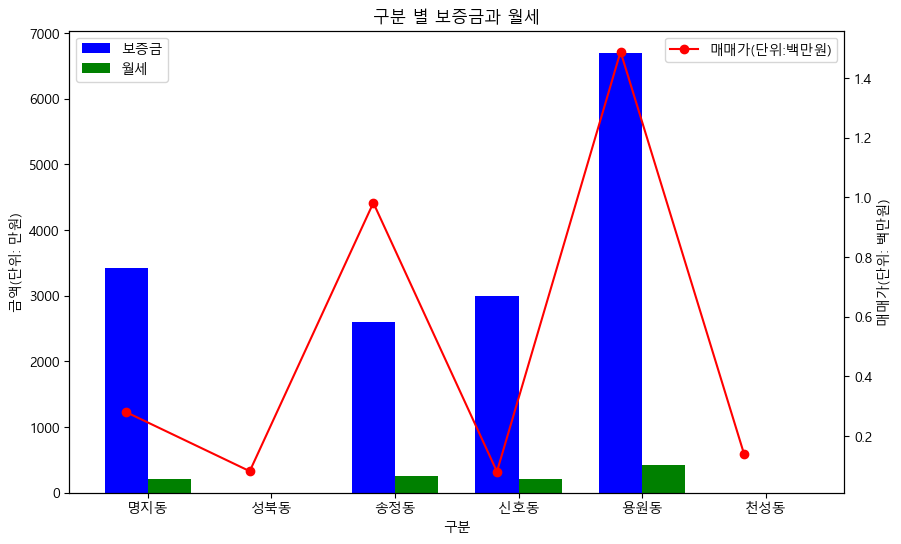

In [31]:
# '구분' 별로 그룹화하여 보증금과 월세를 합산
grouped_df = merge_grouped.groupby('구분').agg({'보증금 (단위: 만원)': 'sum', '월세(단위:만원)': 'sum', '매매가(단위:만원)': 'sum'}).reset_index()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(grouped_df))

# 보증금과 월세 막대 그래프 그리기
ax1.bar(index, grouped_df['보증금 (단위: 만원)'], bar_width, label='보증금', color='blue')
ax1.bar([i + bar_width for i in index], grouped_df['월세(단위:만원)'], bar_width, label='월세', color='green')

ax1.set_xlabel('구분')
ax1.set_ylabel('금액(단위: 만원)')
ax1.set_title('구분 별 보증금과 월세')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(grouped_df['구분'])
ax1.legend(loc='upper left')

# 매매가 선 그래프 그리기
ax2 = ax1.twinx()
ax2.plot(index, grouped_df['매매가(단위:만원)'] / 1e6, color='red', marker='o', label='매매가(단위:백만원)')
ax2.set_ylabel('매매가(단위: 백만원)')
ax2.legend(loc='upper right')

plt.show()

### 시각화(4) - 월세 타입에 대한 구역별 보증금, 월세가

In [32]:
merge_grouped.head()

,구분,타입,타입별 개수,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,명지동,매매,216,467,349,595,279739,0,0
1,명지동,월세,517,1820,182,4,0,3425,207
2,명지동,전세,1,204,122,0,0,0,0
3,성북동,매매,6,0,0,4985,81677,0,0
4,송정동,매매,15,0,0,6592,981420,0,0


In [33]:
month_type = merge_grouped[merge_grouped['타입'] == '월세']
month_type

,구분,타입,타입별 개수,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
1,명지동,월세,517,1820,182,4,0,3425,207
5,송정동,월세,5,600,71,599,0,2600,252
7,신호동,월세,19,268,174,205,0,3000,215
9,용원동,월세,10,493,210,0,0,6700,414


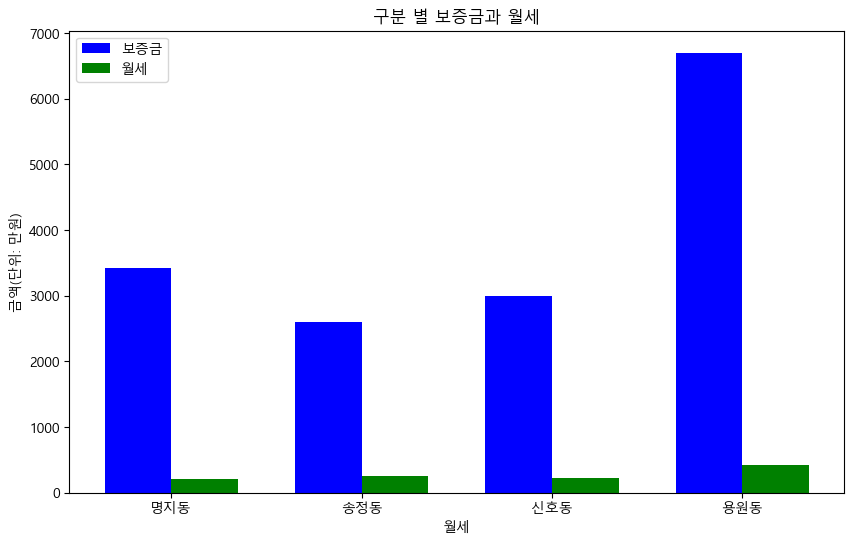

In [34]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(month_type))

# 보증금과 월세 막대 그래프 그리기
ax1.bar(index, month_type['보증금 (단위: 만원)'], bar_width, label='보증금', color='blue')
ax1.bar([i + bar_width for i in index], month_type['월세(단위:만원)'], bar_width, label='월세', color='green')

ax1.set_xlabel('월세')
ax1.set_ylabel('금액(단위: 만원)')
ax1.set_title('구분 별 보증금과 월세')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(month_type['구분'])
ax1.legend(loc='upper left')

plt.show()

### 시각화(5) - 월세, 매매 시각화

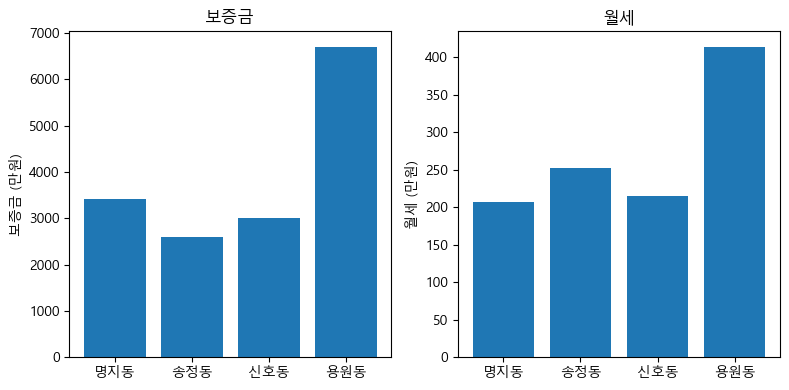

In [35]:
# 월세 시각화
import matplotlib.pyplot as plt

# 각 지역의 이름과 해당 지역의 보증금, 월세 데이터
regions = month_type['구분']
deposits = month_type['보증금 (단위: 만원)']
rents = month_type['월세(단위:만원)']

# 그래프를 그릴 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# 보증금 그래프
axs[0].bar(regions, deposits)
axs[0].set_title('보증금')
axs[0].set_ylabel('보증금 (만원)')

# 월세 그래프
axs[1].bar(regions, rents)
axs[1].set_title('월세')
axs[1].set_ylabel('월세 (만원)')

# 그래프 출력
plt.tight_layout()
plt.show()

In [36]:
# 매매 유형 시각화
sellType = merge_grouped[merge_grouped['타입']=='매매']
sellType

,구분,타입,타입별 개수,계약면적(㎡),전용면적(㎡),대지면적(㎡),매매가(단위:만원),보증금 (단위: 만원),월세(단위:만원)
0,명지동,매매,216,467,349,595,279739,0,0
3,성북동,매매,6,0,0,4985,81677,0,0
4,송정동,매매,15,0,0,6592,981420,0,0
6,신호동,매매,23,41,31,362,80172,0,0
8,용원동,매매,9,171,136,1748,1488222,0,0
10,천성동,매매,10,0,0,1883,138200,0,0


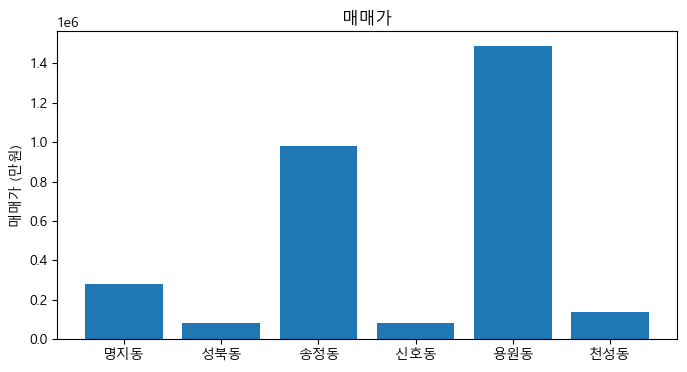

In [37]:
# 각 지역의 이름과 해당 지역의 보증금, 월세 데이터
regions = sellType['구분']
deposits = sellType['매매가(단위:만원)']

# 그래프 그리기
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

# 매매가 그래프
axs.bar(regions, deposits)
axs.set_title('매매가')
axs.set_ylabel('매매가 (만원)')

# 그래프 출력
plt.show()